<a href="https://colab.research.google.com/github/kakkiichan/Machine-Learning/blob/master/Unsupervised/Iris_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.decomposition import PCA
from sklearn.datasets import load_iris
ds = load_iris()

In [45]:
iris_data = ds.data
iris_target = ds.target
iris_feature= ds.feature_names

iris = pd.DataFrame(data=iris_data,columns=iris_feature)
iris_target =pd.DataFrame(data=iris_target,columns=["class"])

iris=iris.join(iris_target)
iris

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),class
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


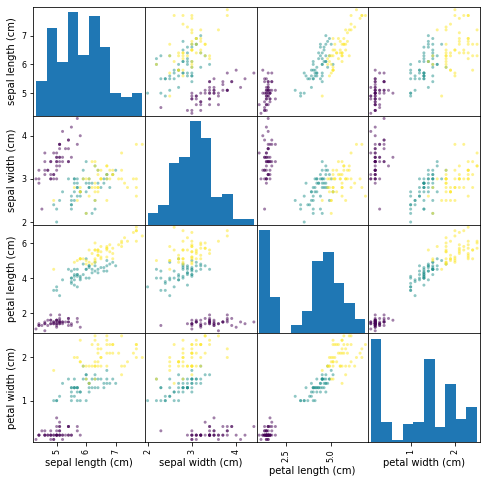

In [39]:
from pandas import plotting 
plotting.scatter_matrix(iris.iloc[:, :4],c=list(iris.iloc[:,4]), figsize=(8, 8))
plt.show()

In [44]:
iris_n = iris.iloc[:, :4].apply(lambda x: (x-x.mean())/x.std(), axis=0)
iris_n.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,-0.897674,1.015602,-1.335752,-1.311052
1,-1.139200,-0.131539,-1.335752,-1.311052
2,-1.380727,0.327318,-1.392399,-1.311052
3,-1.501490,0.097889,-1.279104,-1.311052
4,-1.018437,1.245030,-1.335752,-1.311052


In [0]:
#主成分分析の実行
pca = PCA()
feature = pca.fit(iris_n)
# データを主成分空間に写像
feature = pca.transform(iris_n)

In [55]:
# 分析結果
iris_pca = pd.DataFrame(feature, columns=["PC{}".format(x + 1) for x in range(len(iris_n.columns))])
iris_pca.describe()

,PC1,PC2,PC3,PC4
count,1.500000e+02,1.500000e+02,1.500000e+02,1.500000e+02
mean,9.547918e-17,2.676100e-17,-4.810966e-17,1.646831e-17
std,1.708361e+00,9.560494e-01,3.830886e-01,1.439265e-01
min,-2.765081e+00,-2.645211e+00,-8.545590e-01,-4.681284e-01
25%,-2.095701e+00,-5.964892e-01,-2.581963e-01,-9.057919e-02
50%,4.169144e-01,1.744359e-02,2.467973e-02,-6.804996e-03
75%,1.338543e+00,5.920508e-01,1.938639e-01,7.442836e-02
max,3.299641e+00,2.677315e+00,1.002044e+00,4.878491e-01


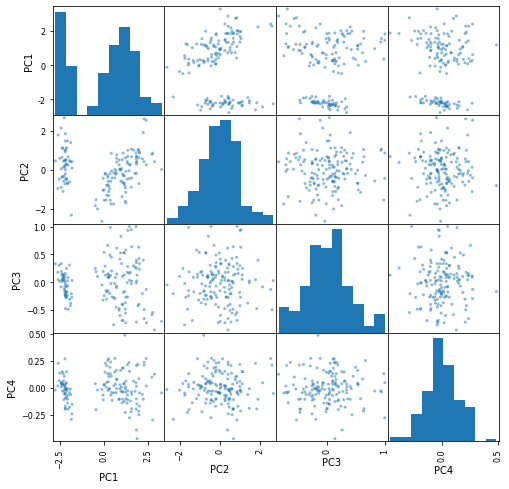

In [60]:
#無相関の確認
plotting.scatter_matrix(iris_pca.iloc[:, :4], figsize=(8, 8))
plt.show()

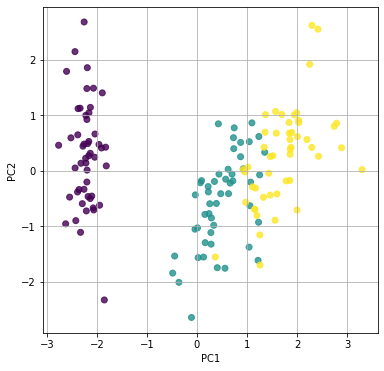

In [57]:
# 第一主成分と第二主成分でプロットする
plt.figure(figsize=(6, 6))
plt.scatter(feature[:, 0], feature[:, 1], alpha=0.8, c=list(iris.iloc[:, 4]))
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

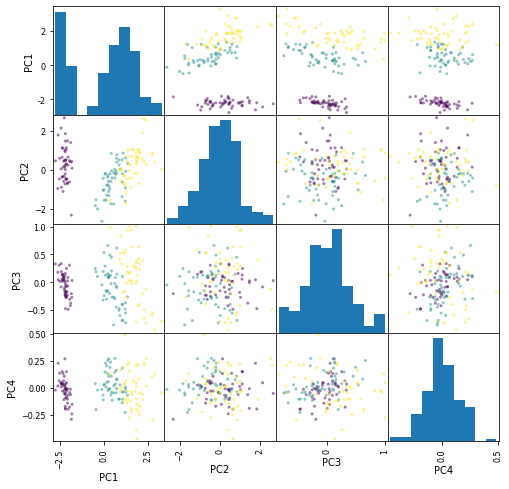

In [62]:
plotting.scatter_matrix(pd.DataFrame(feature, 
                        columns=["PC{}".format(x + 1) for x in range(len(iris_n.columns))]), 
                        figsize=(8, 8), c=list(iris.iloc[:, 4])) 
plt.show()

In [64]:
# 寄与率
pd.DataFrame(pca.explained_variance_ratio_, index=["PC{}".format(x + 1) for x in range(len(iris_n.columns))])

,0
PC1,0.729624
PC2,0.228508
PC3,0.036689
PC4,0.005179


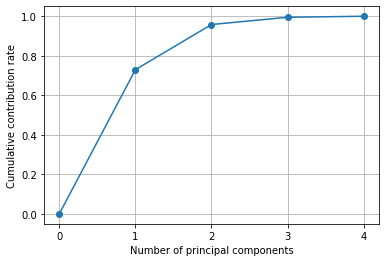

In [65]:
# 累積寄与率を図示する
import matplotlib.ticker as ticker
plt.gca().get_xaxis().set_major_locator(ticker.MaxNLocator(integer=True))
plt.plot([0] + list( np.cumsum(pca.explained_variance_ratio_)), "-o")
plt.xlabel("Number of principal components")
plt.ylabel("Cumulative contribution rate")
plt.grid()
plt.show()

In [68]:
# PCA の固有値
pd.DataFrame(pca.explained_variance_, index=["PC{}".format(x + 1) for x in range(len(iris_n.columns))])

,0
PC1,2.918498
PC2,0.914030
PC3,0.146757
PC4,0.020715


In [69]:
# PCA の固有ベクトル
pd.DataFrame(pca.components_, columns=iris.columns[:4], index=["PC{}".format(x + 1) for x in range(len(iris_n.columns))])

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
PC1,0.521066,-0.269347,0.580413,0.564857
PC2,0.377418,0.923296,0.024492,0.066942
PC3,-0.719566,0.244382,0.142126,0.634273
PC4,-0.261286,0.123510,0.801449,-0.523597


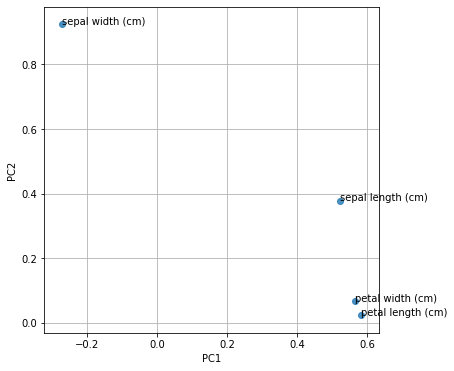

In [70]:
# 第一主成分と第二主成分における観測変数の寄与度をプロットする
plt.figure(figsize=(6, 6))
for x, y, name in zip(pca.components_[0], pca.components_[1], iris.columns[:4]):
    plt.text(x, y, name)
plt.scatter(pca.components_[0], pca.components_[1], alpha=0.8)
plt.grid()
plt.xlabel("PC1")
plt.ylabel("PC2")
plt.show()

◯参考
https://qiita.com/maskot1977/items/082557fcda78c4cdb41f